## 1 ##
## Dr. X: this gets sequences 

In [12]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl


In [13]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [14]:
# Line1: this line defines a new function called get_sequences_from_file with input file fasta_fn
# Line2: we creates a new dictionary called sequence_data_dict
# Line3: for every record in fasta_fn, the biopython function SeqIO.parse will find the sequences in the file 
# Line4: we use the split() function to splits our original string and then stores each variable in a separate string
# Line5: we pull the species_name from fasta file
# Line6: we assign the sequence to the species name (key) in the dictionary
# Line7: Finally, return returns the dictionary of species name and sequence

## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########

In [15]:
def translate_sequences(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string=""  
    for i in range(0,len(string_nucleotides),3):
        codon=string_nucleotides[i]+string_nucleotides[i+1]+string_nucleotides[i+2]        
        if codon in ["TAA","TAG","AGA","AGG"]:
            break
        else:
            aa_seq_string +=mito_table.forward_table[codon]
    return(aa_seq_string)

In [16]:
#Line1: define a new function to translate a string of nucleotides
#Line2: provides a table with each codon and the abbreviation for each amino acid
#Line3: create a variable to hold the new amino acid sequence 
#Line4: use a loop to get every three nucleotides until the end of the string
#Line5: define a codon as set of 3 nucleotides
#Line6,7: check for stop codon and return the sequence before the codon
#Line8,9: Translate the nucleotides into amino acids and add them to an amino acid string
#Line10: End the loop and return the amino acid string

## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########

In [17]:
def biopython_translate(string_nucleotides):
    aa_string=Seq.translate(string_nucleotides, table=2, to_stop=True)
    return aa_string

In [18]:
# Documentation: 
#    http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

#Line1: define a function that translate a string of nucleotides into an amino acid
#Line2: table=2 is the codon table for mitochondria; to_stop=translation is stopped at the first stop codon 
#Line3: return the translation

## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
#calculates the molecular weight of each amino acid sequence

In [19]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [20]:
def compute_molecular_weight(aa_seq_string):
    analyzed_seq = ProteinAnalysis(aa_seq_string)
    Molecular_Weight = analyzed_seq.molecular_weight()
    return Molecular_Weight


In [21]:
#Line1: function to calculate the molecular weight of the amino acid sequences. 
#Line2: We used the ProteinAnalysis function on the inputted aa string and put it into a new variable called "analyzed_seq". 
#Line3: The analyzed_seq.molecular_weight()" function on analyzed_seq variable and creating a variable Molecular_Weight

## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########

In [22]:
def GC_content(string_nucleotides):
    GC_count = 0
    for base in string_nucleotides:
        if base is 'G' or base is 'C':
            GC_count += 1
    percent = GC_count / len(string_nucleotides)
    GC_content = percent*100 
    return GC_content

In [23]:
#Line1: Define a function to calculate the GC_content
#Line2: Set the initial value as 0
#Line3-5: use a for-loop to count G and C bases on to the string
#Line6: calculate the percentage of GC counting
#Line7: define a new variable GC_content on percentage value
#Line8: return the GC_content

## 6 ## 
##Add two new columns to the penguin DataFrame: (1)
#molecular weight and (2) GC content.

In [24]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [25]:
#Lines1: Get sequences from the penguins_cytb FASTA file
#Lines2: Dataframe that includes only data for body mass
#Lines3: Read the file to a list called species_list

In [26]:
penguins_df["Molecular_Weight"]= "NaN"
penguins_df["GC_content"]= "NaN"
print(penguins_df)

                    species   mass Molecular_Weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


In [27]:
#Lines1: Define column Molecular_weight with values as NaN's
#Lines2: Define column GC_content with values as NaN's
#Lines3: Print the data frame

## 7 ##
##Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content

In [28]:
from Bio.SeqUtils import GC

In [29]:
count= 0 
for key, value in cytb_seqs.items():
    species_seq = str(value)
    aa_seq_string = biopython_translate(species_seq)
    Molecular_Weight = compute_molecular_weight(aa_seq_string)
    penguins_df.set_value(count, "Molecular_Weight", Molecular_Weight)
    GC_content = GC(species_seq)
    penguins_df.set_value(count, "GC_content", GC_content)
    count = count + 1

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [30]:
#Line1: stablish count on 0
#Line2: for-loop to key(species) and value(mass) on the sequences from the penguins_cytb FASTA file
#Line3-4: translate DNA sequence into aminoacid sequence
#Line5-6: compute the molecular weight of the translate DNA sequence
#Line7-8: compute the GC_content from DNA sequence
#Line9: row using the index value and count 

In [31]:
penguins_df

,species,mass,Molecular_Weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


## 8 ##
##Plot a bar-chart of the mass with the x-axes labeled with species names.

In [32]:
import matplotlib.pylab as plt

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

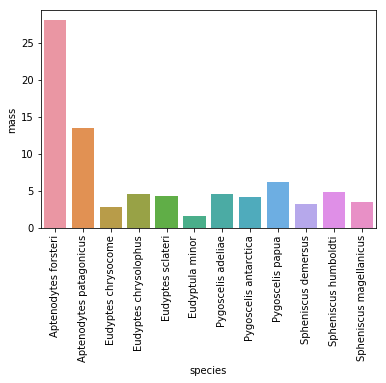

In [33]:
sns.barplot(y = "mass", x = "species", data = penguins_df)
plt.xticks(rotation=90)
#Line1: creating a boxplot of the mass of the various penguin species
#Line2: modifiyng the angle of species name to made it readable.

In [34]:
# Documentation: https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

In [35]:
## *Q1* What is the smallest penguin species? 
# The smallest penguin species is "Eudyptula minor"

## *Q2* What else is interesting about this species?
# It is the mascot for Linux. The creator of linux (Linus Torvalds) was
# bitten by a small penguin (https://en.wikipedia.org/wiki/Little_penguin)

## 9 ##
##Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

In [ ]:
sns.lmplot(y = "Molecular_Weight", x = "GC_content", data = penguins_df)

## 10 ##
##Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [38]:
penguins_df.to_csv('penguins_mass_cytb.csv')

## 11 - BONUS ##
##What else can we do with this dataset in Python? 
##Add functions or anything that might be interesting and fun. (optional)

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

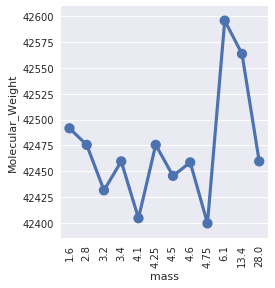

In [46]:
sns.factorplot(y = "Molecular_Weight", x = "mass", data = penguins_df)
plt.xticks(rotation=90)
# This plot shows the relationship between Molecular_Weight and Mass. 